# Shipping experiment analysis ITS - species level

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data


## stacked area plot for all present species (not many, therefore include all)

In [4]:
pwd

'/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data'

In [4]:
#import metadata:
metadata = pd.read_csv('20250513_ITS_shipping_general_metadata_all_samples_with_alpha_diversity_16S_ITS.csv', sep=',', index_col=0)
metadata

,Chao1 kmers ITS,Chao1 OTUs ITS,Chao1 ASVs ITS,16S_id,Chao1 kmers,Chao1 OTUs,Chao1 ASVs,identifier,row,column,...,Observed features kmers ITS,Shannon ASVs ITS,Evenness ASVs ITS,Simpson ASVs ITS,Shannon OTUs ITS,Evenness OTUs ITS,Simpson OTUs ITS,Shannon kmers ITS,Evenness kmers ITS,Simpson kmers ITS
366292_209-LP4-ITS-0709,747.0,2.00,4.000000,366294_209-LP4-16S-0709,678.0,5.0,4.0,W00.00.00,E,5,...,747.0,1.023700,0.511850,0.387775,0.301049,0.301049,0.101261,8.420116,0.882153,0.996797
366292_121-LP4-ITS-0621,1052.0,4.00,6.000000,366294_121-LP4-16S-0621,244.0,1.0,1.0,W30.02.28,E,6,...,1052.0,0.973628,0.376651,0.377949,0.220637,0.110319,0.056100,8.340575,0.830824,0.996682
366292_212-LP4-ITS-0712,1253.0,7.50,7.000000,366294_212-LP4-16S-0712,718.0,5.0,6.0,W30.03.21,H,5,...,1253.0,0.813642,0.289825,0.337533,0.091995,0.032769,0.017630,8.253068,0.801956,0.996594
366292_225-LP4-ITS-0725,1212.0,5.00,7.000000,366294_225-LP4-16S-0725,708.0,6.0,5.0,W17.02.14,E,7,...,1212.0,0.800344,0.285088,0.338125,0.051600,0.022223,0.009683,8.229968,0.803459,0.996578
366292_201-LP4-ITS-0701,1204.0,5.00,8.000000,366294_201-LP4-16S-0701,708.0,5.0,5.0,W04.02.04,E,4,...,1204.0,1.144517,0.381506,0.390090,0.329954,0.142104,0.083077,8.529651,0.833493,0.996862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366292_181-LP4-ITS-0681,3357.0,23.50,26.428571,366294_181-LP4-16S-0681,708.0,5.0,5.0,W30.03.03,A,2,...,3357.0,1.155855,0.248900,0.388582,0.459375,0.103012,0.101151,8.474403,0.723507,0.996769
366292_251-LP4-ITS-0751,3265.0,16.25,34.000000,366294_251-LP4-16S-0751,708.0,5.0,8.0,W04.03.01,G,10,...,3265.0,1.052332,0.226607,0.377837,0.284167,0.071042,0.057944,8.393120,0.719028,0.996696
366292_260-LP4-ITS-0760,3137.0,23.50,32.000000,366294_260-LP4-16S-0760,708.0,5.0,5.0,W30.02.01,H,11,...,3137.0,1.222896,0.263336,0.410682,0.527800,0.116678,0.117316,8.511062,0.732754,0.996812
366292_264-LP4-ITS-0764,3434.0,30.20,25.375000,366294_264-LP4-16S-0764,708.0,5.0,5.0,W04.03.04,D,12,...,3434.0,1.233053,0.265523,0.405510,0.487944,0.103808,0.102250,8.521965,0.725541,0.996818


In [18]:
#import OTU feature table (also )
#OTU table 20250513_relative_features_OTU_species_names.csv:
otu_table = pd.read_csv('ITS/OTUs/alpha_rarefaction/core-metrics-results-1000/20250511_relative_features_OTU_species_names_combined.csv', sep=',', index_col=0)
otu_table



,Alternaria rosae,Alternaria sp.,Aspergillus ruber,Aureobasidium pullulans,Bensingtonia sp.,Bipolaris yamadae,Cladosporium herbarum,Cystofilobasidium macerans,Dioszegia fristingensis,Dioszegia hungarica,...,Pleosporaceae sp.,Pyrenophora dictyoides,Pyrenophora tritici-repentis,Pyrenophora variabilis,Saccharomyces cerevisiae,Sporobolomyces roseus,Sporobolomyces ruberrimus,Stemphylium vesicarium,Udeniomyces pyricola,Vishniacozyma victoriae
366292_118-LP4-ITS-0618,0.000858,0.006289,0.000286,0.002001,0.000000,0.000000,0.001144,0.000286,0.000000,0.000000,...,0.001429,0.000000,0.000000,0.000000,0.985992,0.000000,0.000000,0.000858,0.000000,0.000000
366292_124-LP4-ITS-0624,0.001144,0.005432,0.000000,0.001144,0.000000,0.000000,0.001144,0.000000,0.000000,0.000000,...,0.006289,0.000000,0.001144,0.000000,0.982847,0.000000,0.000000,0.000286,0.000000,0.000000
366292_128-LP4-ITS-0628,0.000572,0.005149,0.000000,0.001430,0.000000,0.000000,0.000572,0.000000,0.000286,0.000000,...,0.000858,0.000000,0.000000,0.001144,0.988558,0.000000,0.000000,0.000286,0.000286,0.000000
366292_130-LP4-ITS-0630,0.001144,0.006289,0.000000,0.000572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006861,0.000000,0.000286,0.000000,0.983705,0.000000,0.000000,0.000286,0.000000,0.000000
366292_132-LP4-ITS-0632,0.001145,0.020905,0.000286,0.003150,0.000000,0.000000,0.002291,0.000573,0.000000,0.000000,...,0.011741,0.000000,0.003436,0.000286,0.952749,0.000000,0.000000,0.001718,0.000286,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366292_263-LP4-ITS-0763,0.002292,0.009453,0.000000,0.003151,0.000000,0.000000,0.003724,0.000000,0.000573,0.000000,...,0.004297,0.000000,0.001146,0.000573,0.971928,0.000000,0.000000,0.000573,0.000286,0.000000
366292_264-LP4-ITS-0764,0.003723,0.015464,0.000286,0.006873,0.000573,0.000000,0.004868,0.000000,0.000286,0.001718,...,0.006300,0.000286,0.002005,0.001432,0.947308,0.001432,0.000573,0.000859,0.000286,0.000286
366292_265-LP4-ITS-0765,0.003731,0.016648,0.001435,0.006315,0.000000,0.000000,0.004305,0.000000,0.000574,0.000000,...,0.002870,0.000000,0.001722,0.001435,0.955798,0.000287,0.000287,0.000574,0.000574,0.000287
366292_266-LP4-ITS-0766,0.003730,0.017504,0.000000,0.004591,0.000287,0.000000,0.005739,0.000000,0.000287,0.000000,...,0.004591,0.000287,0.001722,0.001435,0.952941,0.000574,0.000287,0.000861,0.000287,0.000000


In [6]:
otu_table.columns.to_list()

['Alternaria rosae',
 'Alternaria sp.',
 'Aspergillus ruber',
 'Aureobasidium pullulans',
 'Bensingtonia sp.',
 'Bipolaris yamadae',
 'Cladosporium herbarum',
 'Cystofilobasidium macerans',
 'Dioszegia fristingensis',
 'Dioszegia hungarica',
 'Filobasidium chernovii',
 'Filobasidium wieringae',
 'Fusarium poae',
 'Hanseniaspora uvarum',
 'Itersonilia pannonica',
 'Kazachstania exigua',
 'Microdochium nivale',
 'Neoascochyta exitialis',
 'Parastagonospora sp.',
 'Pleosporaceae sp.',
 'Pyrenophora dictyoides',
 'Pyrenophora tritici-repentis',
 'Pyrenophora variabilis',
 'Saccharomyces cerevisiae',
 'Sporobolomyces roseus',
 'Sporobolomyces ruberrimus',
 'Stemphylium vesicarium',
 'Udeniomyces pyricola',
 'Vishniacozyma victoriae']

In [7]:
#which columns are the ones with highest abundance? (sum over all samples):
otu_table.sum(axis=0).sort_values(ascending=False).head(20)

Saccharomyces cerevisiae        92.773115
Alternaria sp.                   0.930393
Aureobasidium pullulans          0.246139
Pleosporaceae sp.                0.223789
Cladosporium herbarum            0.188331
Alternaria rosae                 0.115344
Pyrenophora tritici-repentis     0.080420
Pyrenophora variabilis           0.076411
Stemphylium vesicarium           0.057801
Parastagonospora sp.             0.051228
Neoascochyta exitialis           0.029200
Sporobolomyces roseus            0.025755
Filobasidium wieringae           0.021189
Udeniomyces pyricola             0.018896
Itersonilia pannonica            0.017456
Kazachstania exigua              0.017173
Hanseniaspora uvarum             0.014589
Aspergillus ruber                0.014023
Filobasidium chernovii           0.011739
Pyrenophora dictyoides           0.010878
dtype: float64

- Saccharomyces cerevisiae (92.8%)
Absolutely expected. This is the primary baker's yeast, commonly added as a starter or occurring naturally. Its dominance is typical, especially in industrial or semi-natural fermentations.
- Aureobasidium pullulans
Plausible. A ubiquitous yeast-like fungus found on plant surfaces and in flour. Frequently reported in early-stage sourdough fermentations and environmental studies of bakeries.
- Cladosporium herbarum
Common environmental contaminant. Found on grain, in flour, and air. Its low abundance is expected and usually not functionally relevant in mature sourdough.
- Alternaria sp. and Alternaria rosae
Frequently found in flour. Common plant-associated fungi and secondary colonizers of cereal grains. Presence at low levels is normal; they are often reduced during fermentation.
- Pleosporaceae sp.
Likely derived from flour or environment. This family includes several cereal-associated saprophytes and pathogens. Common in metagenomic surveys of flour.

- Pyrenophora tritici-repentis, Pyrenophora variabilis
These are wheat pathogens (e.g., tan spot disease). They can persist in flour but are usually not active or enriched in sourdough fermentations. Their detection might reflect DNA persistence from raw material.
- Stemphylium vesicarium
Primarily a plant pathogen. Rare in fermented foods but possible as an environmental/flour contaminant.
- Parastagonospora sp.
Wheat pathogen. Like the Pyrenophora species, its DNA might persist from the grain/flour input.

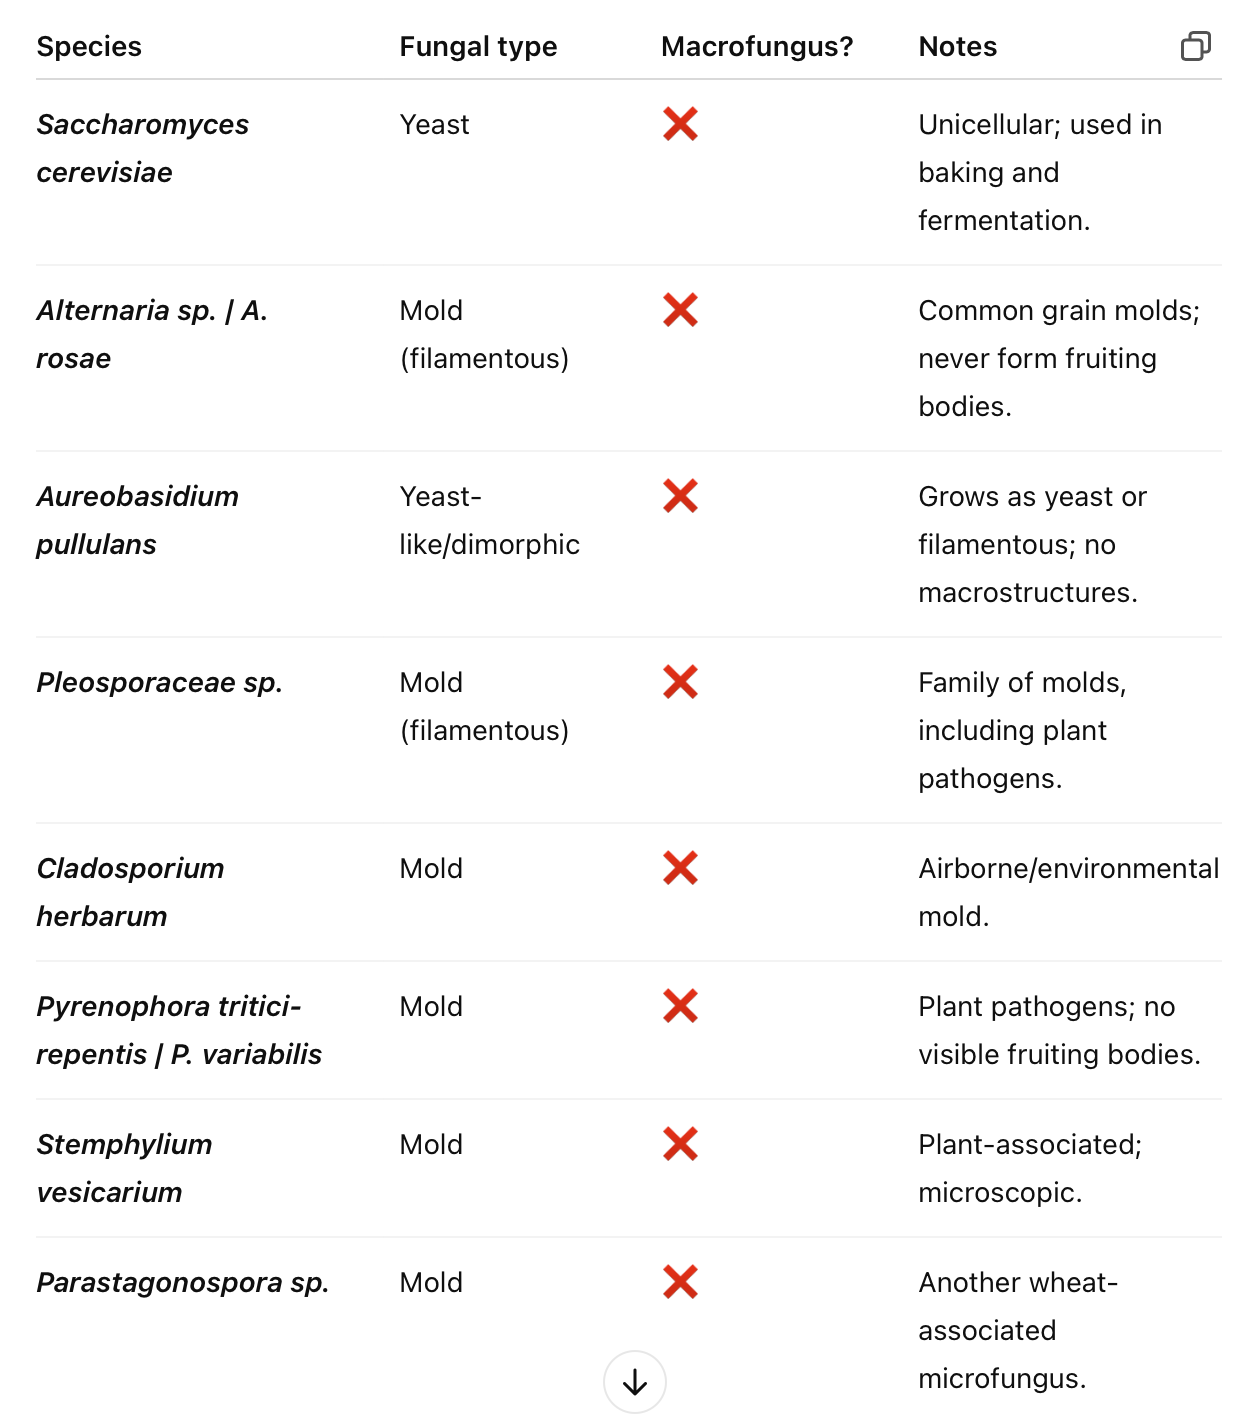

In [96]:
# Sum abundance across all samples for each taxon (i.e., by column)
taxa_sums = otu_table.sum(axis=0)

# Identify the top 10 most abundant taxa (column names)
top_10_taxa = taxa_sums.sort_values(ascending=False).head(10).index

# Keep only the top 10 taxa
otu_top10 = otu_table[top_10_taxa]

# Sum the rest of the taxa into an 'Other' column
otu_other = otu_table.drop(columns=top_10_taxa)
otu_top10['Other'] = otu_other.sum(axis=1)

# Now otu_top10 has only 11 columns: top 10 taxa + 'Other'


/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_84750/1642851083.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otu_top10['Other'] = otu_other.sum(axis=1)


In [97]:
otu_top10

,Saccharomyces cerevisiae,Alternaria sp.,Aureobasidium pullulans,Pleosporaceae sp.,Cladosporium herbarum,Alternaria rosae,Pyrenophora tritici-repentis,Pyrenophora variabilis,Stemphylium vesicarium,Parastagonospora sp.,Other
366292_118-LP4-ITS-0618,0.985992,0.006289,0.002001,0.001429,0.001144,0.000858,0.000000,0.000000,0.000858,0.000572,0.000858
366292_124-LP4-ITS-0624,0.982847,0.005432,0.001144,0.006289,0.001144,0.001144,0.001144,0.000000,0.000286,0.000572,0.000000
366292_128-LP4-ITS-0628,0.988558,0.005149,0.001430,0.000858,0.000572,0.000572,0.000000,0.001144,0.000286,0.000286,0.001144
366292_130-LP4-ITS-0630,0.983705,0.006289,0.000572,0.006861,0.000000,0.001144,0.000286,0.000000,0.000286,0.000000,0.000858
366292_132-LP4-ITS-0632,0.952749,0.020905,0.003150,0.011741,0.002291,0.001145,0.003436,0.000286,0.001718,0.000000,0.002577
...,...,...,...,...,...,...,...,...,...,...,...
366292_263-LP4-ITS-0763,0.971928,0.009453,0.003151,0.004297,0.003724,0.002292,0.001146,0.000573,0.000573,0.000859,0.002005
366292_264-LP4-ITS-0764,0.947308,0.015464,0.006873,0.006300,0.004868,0.003723,0.002005,0.001432,0.000859,0.002005,0.009164
366292_265-LP4-ITS-0765,0.955798,0.016648,0.006315,0.002870,0.004305,0.003731,0.001722,0.001435,0.000574,0.000861,0.005741
366292_266-LP4-ITS-0766,0.952941,0.017504,0.004591,0.004591,0.005739,0.003730,0.001722,0.001435,0.000861,0.001148,0.005739


In [98]:
otu_top10.columns.to_list()

['Saccharomyces cerevisiae',
 'Alternaria sp.',
 'Aureobasidium pullulans',
 'Pleosporaceae sp.',
 'Cladosporium herbarum',
 'Alternaria rosae',
 'Pyrenophora tritici-repentis',
 'Pyrenophora variabilis',
 'Stemphylium vesicarium',
 'Parastagonospora sp.',
 'Other']

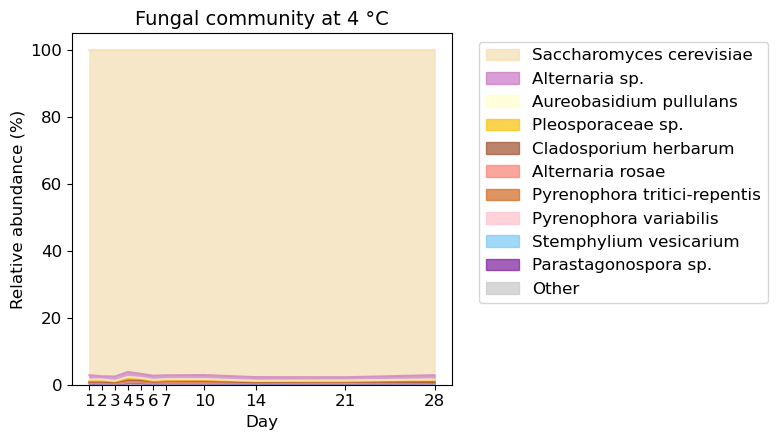

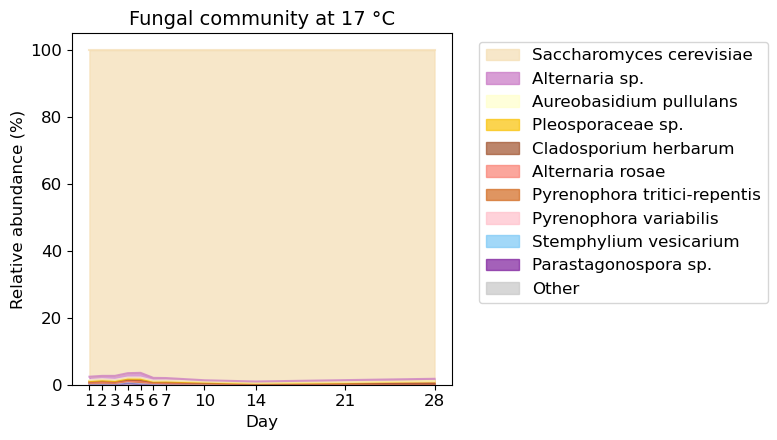

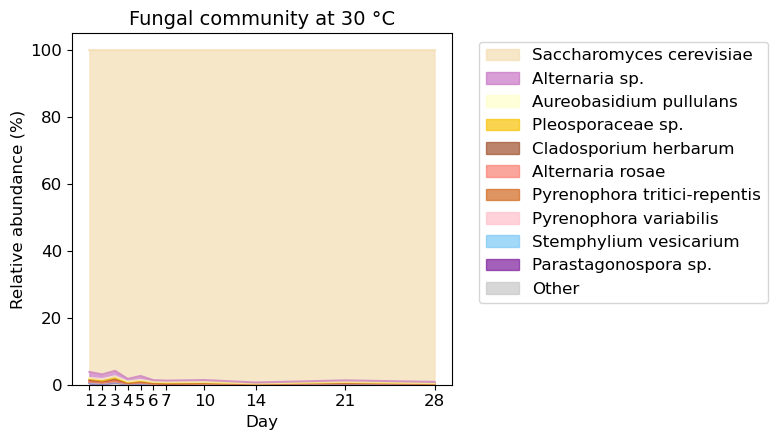

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

custom_order = [
    'Other',
    'Parastagonospora sp.',
 'Stemphylium vesicarium',
 'Pyrenophora variabilis',
 'Pyrenophora tritici-repentis',
 'Alternaria rosae',
 'Cladosporium herbarum',
 'Pleosporaceae sp.',
 'Aureobasidium pullulans',
 'Alternaria sp.',
 'Saccharomyces cerevisiae'
 ]

# # Define custom colors for species
# custom_colors = {
#     's__Lactobacillus_brevis': '#1f77b4',
#     's__Lactobacillus_sanfranciscensis_TMW_1.1304': '#7fffd4',
#     's__Lactobacillus_rossiae': '#2ca02c',
#     's__Acetobacter_pasteurianus': '#ffc0cb',
#     's__uncultured_bacterium': '#9467bd',
#     's__uncultured_organism': '#8c564b',
#     's__Pantoea_agglomerans': '#e377c2',
#     's__Bacillus_halotolerans': '#7f7f7f',
#     's__Paenibacillus_hordei': '#bcbd22',
#     's__Faecalibacterium_prausnitzii': '#17becf',
#     'Other': '#c7c7c7'  # Default color for "Other"
# }

# Define custom colors for species
custom_colors = {
    'Saccharomyces cerevisiae': '#f5deb3',
    'Alternaria sp.': '#c875c4',
    'Aureobasidium pullulans': '#ffffcb',
    'Pleosporaceae sp.': '#fac205',
    'Cladosporium herbarum': '#a0522d',
    'Alternaria rosae': '#fa8072',
    'Pyrenophora tritici-repentis': '#d2691e',
    'Pyrenophora variabilis': '#ffc0cb',
    'Stemphylium vesicarium': '#7bc8f6',
    'Parastagonospora sp.': '#7e1e9c',
    #'Other': '#c7c7c7'  # Default color for "Other"
}


# Define a renaming dictionary for species
# renaming_dict = {
#     's__Lactobacillus_brevis': 'Lactobacillus brevis',
#     's__Lactobacillus_sanfranciscensis_TMW_1.1304': 'Lactobacillus sanfranciscensis',
#     's__Lactobacillus_rossiae': 'Lactobacillus rossiae',
#     's__Acetobacter_pasteurianus': 'Acetobacter pasteurianus',
#     's__uncultured_bacterium': 'Pediococcus (uncultured)',
#     's__uncultured_organism': 'Prevotellaceae (uncultured)',
#     's__Pantoea_agglomerans': 'Pantoea agglomerans',
#     's__Bacillus_halotolerans': 'Bacillus halotolerans',
#     's__Paenibacillus_hordei': 'Paenibacillus hordei',
#     's__Faecalibacterium_prausnitzii': 'Faecalibacterium prausnitzii',
#     'Other': 'Other'
# }
# Define a renaming dictionary for species
renaming_dict = {
    'Saccharomyces cerevisiae': 'Saccharomyces cerevisiae',
    'Alternaria sp.': 'Alternaria sp.',
    'Aureobasidium pullulans': 'Aureobasidium pullulans',
    'Pleosporaceae sp.': 'Pleosporaceae sp.',
    'Cladosporium herbarum': 'Cladosporium herbarum',
    'Alternaria rosae': 'Alternaria rosae',
    'Pyrenophora tritici-repentis': 'Pyrenophora tritici-repentis',
    'Pyrenophora variabilis': 'Pyrenophora variabilis',
    'Stemphylium vesicarium': 'Stemphylium vesicarium',
    'Parastagonospora sp.': 'Parastagonospora sp.',
    'Other': 'Other'
}

# --- Step 1: Merge OTU table with metadata to bring in Day and Temperature ---
otu_with_metadata = otu_table.copy()
otu_with_metadata['day'] = metadata['day']
otu_with_metadata['temperature'] = metadata['temperature']

# --- Step 2: Filter for relevant time points ---
time_points = [1, 2, 3, 4, 5, 6, 7, 10, 14, 21, 28]
otu_with_metadata = otu_with_metadata[otu_with_metadata['day'].isin(time_points)]

# --- Step 3: Function to generate and plot relative abundance ---
def plot_relative_abundance_area(df, temp, custom_order=None, custom_colors=None, renaming_dict=None):
    # Filter data for the selected temperature
    df_temp = df[df['temperature'] == temp]

    # Group by Day and compute mean abundance per species
    grouped = df_temp.groupby('day').mean()
    grouped = grouped.drop(columns=['temperature'], errors='ignore')  # Drop non-species columns

    # Normalize to relative abundance
    relative_abundance = grouped.div(grouped.sum(axis=1), axis=0) * 100

    # Identify top 10 species over all days for the current temperature
    mean_abundance = relative_abundance.mean()
    top_species = mean_abundance.nlargest(10).index.tolist()

    # Apply custom order if provided
    if custom_order:
        custom_order = [s for s in custom_order if s in relative_abundance.columns]
    else:
        custom_order = top_species

    # Ensure all columns are accounted for
    species_columns = [col for col in relative_abundance.columns if col in custom_order]
    other_species = [col for col in relative_abundance.columns if col not in custom_order]
    
    # Collapse "Other"
    relative_abundance['Other'] = relative_abundance[other_species].sum(axis=1)
    relative_abundance = relative_abundance[['Other']+custom_order]
    #relative_abundance = relative_abundance[custom_order]

    # Rename species if needed
    if renaming_dict:
        relative_abundance.columns = [renaming_dict.get(col, col) for col in relative_abundance.columns]

    # Define colors
    if custom_colors:
        colors = [custom_colors.get(col, '#c7c7c7') for col in relative_abundance.columns]
    else:
        colors = [f'#{hash(col) & 0xFFFFFF:06x}' for col in relative_abundance.columns]

    # Plot
    ax = relative_abundance.plot(
        kind='area', stacked=True, color=colors,
        figsize=(8, 4.5), alpha=0.7
    )
    ax.set_title(f"Fungal community at {temp} °C", fontsize=14)
    ax.set_xlabel("Day", fontsize=12)
    ax.set_ylabel("Relative abundance (%)", fontsize=12)
    ax.set_xticks(time_points)
    ax.tick_params(axis='x',labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xticklabels(time_points)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), title="", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=12)

    plt.tight_layout()
    #save pdf
    plt.savefig(f'Figures/20250517_relative_abundance_area_{temp}C_ITS.pdf', bbox_inches='tight')
    plt.show()

# --- Step 4: Loop through each temperature and plot ---
for temp in sorted(otu_with_metadata['temperature'].dropna().unique()):
    plot_relative_abundance_area(
        otu_with_metadata, temp,
        custom_order=custom_order,
        custom_colors=custom_colors,
        renaming_dict=renaming_dict
    )


### differential abundance

### switch to R, run ancombc-2, return here for visuals

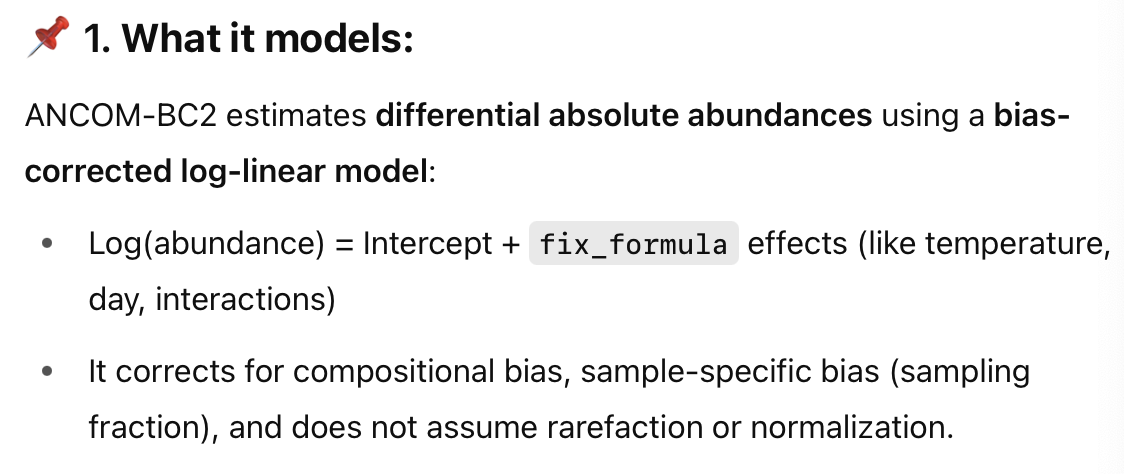

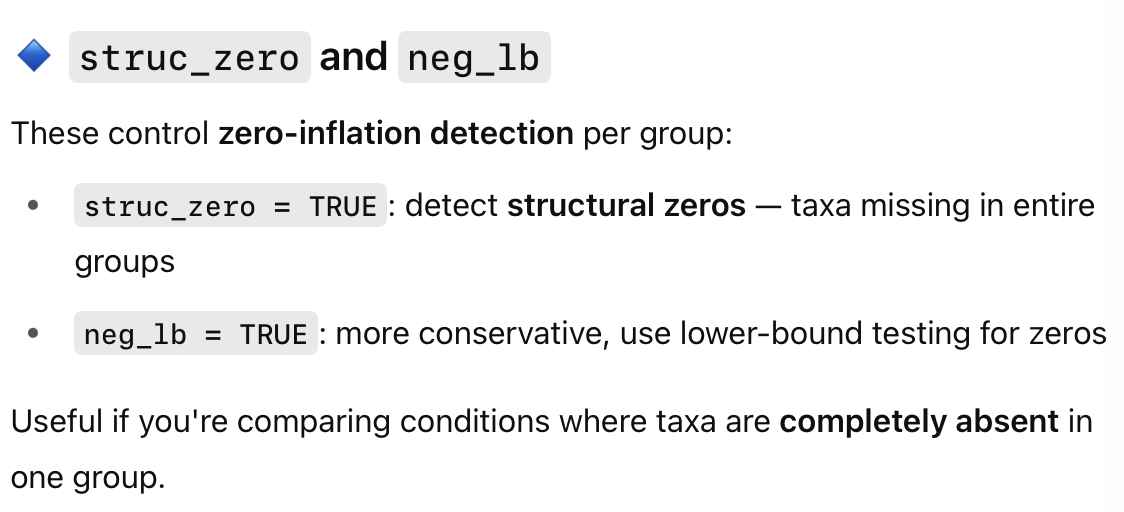

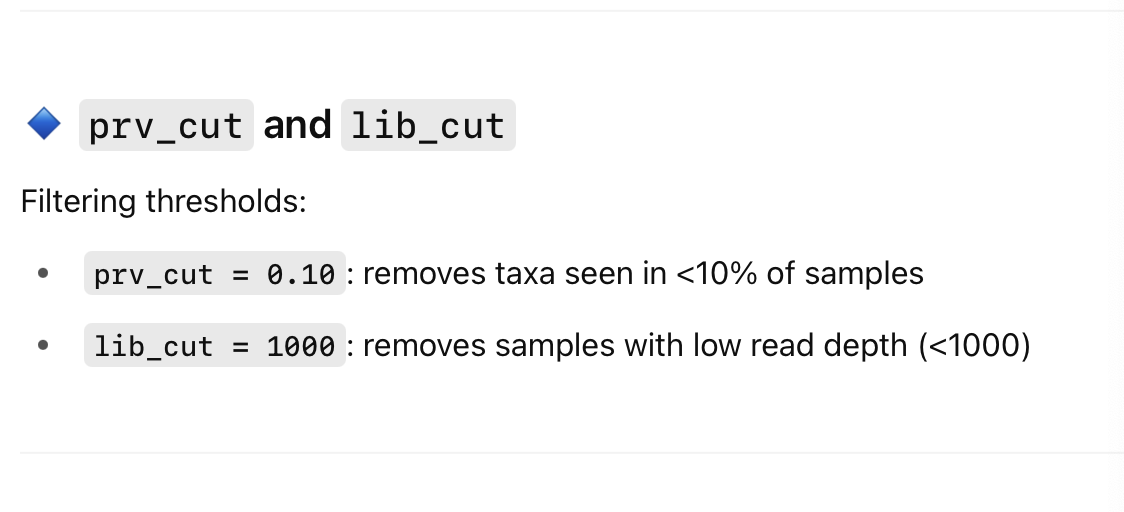

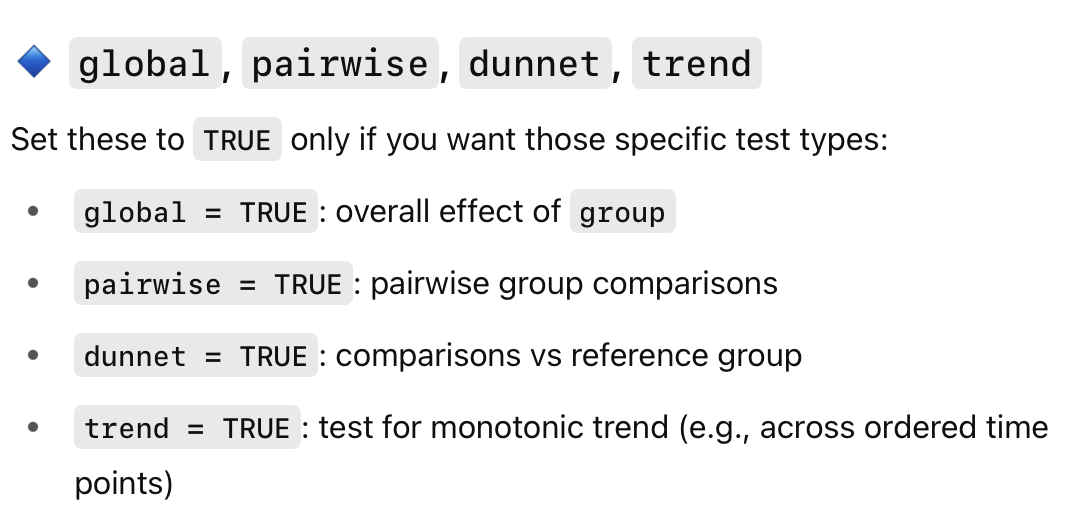

ancombc-2 output:
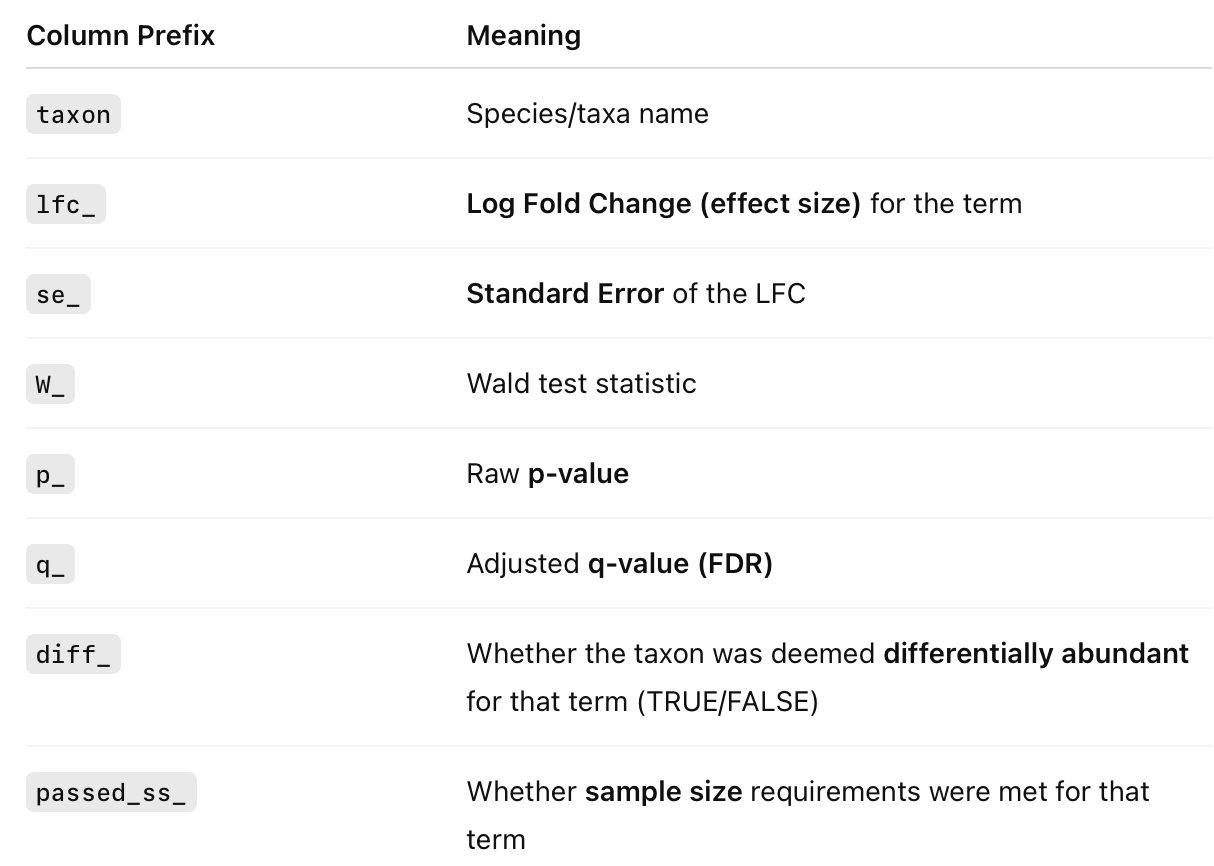


### group = temperature outputs:

with group = 'day' it fails... 

In [5]:
#import ancombc2_results.csv:
ancombc2_results = pd.read_csv('Stats/ancombc2_main_results_temperature_group_ITS.csv', sep=',', index_col=0)
ancombc2_results
ancom_pairwise_results = pd.read_csv('Stats/ancombc2_pairwise_results_temp_group_ITS.csv', sep=',', index_col=0)
ancom_pairwise_results
ancom_global_results = pd.read_csv('Stats/ancombc2_global_results_temp_group_ITS.csv', sep=',', index_col=0)
ancom_global_results

,taxon,W,p_val,q_val,diff_abn,passed_ss
1,Alternaria rosae,0.039869,0.078024,0.612985,False,True
2,Alternaria sp.,1.375200,0.535566,0.749792,False,False
3,Aureobasidium pullulans,0.101492,0.192385,0.612985,False,True
4,Cladosporium herbarum,0.272633,0.472956,0.735710,False,True
5,Filobasidium wieringae,0.171234,0.303020,0.681805,False,True
6,Neoascochyta exitialis,NaN,1.000000,1.000000,False,True
7,Parastagonospora sp.,0.117160,0.218923,0.612985,False,True
8,Pleosporaceae sp.,0.360661,0.598433,0.761642,False,True
9,Pyrenophora tritici-repentis,0.093945,0.178574,0.612985,False,True
10,Pyrenophora variabilis,0.105191,0.198596,0.612985,False,True


In [6]:
ancombc2_results

,taxon,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
1,Alternaria rosae,-0.085088,0.464076,0.183857,-0.273802,-0.054453,0.186449,0.247527,-0.213357,-0.002443,...,True,True,True,True,True,True,True,True,True,True
2,Alternaria sp.,0.578727,-0.353765,0.034037,-0.054601,-0.161612,-0.325827,-0.366497,-0.870939,-0.528584,...,True,True,True,True,True,False,False,True,True,False
3,Aureobasidium pullulans,0.093354,0.194131,0.090558,0.097209,-0.169080,0.020796,0.145853,-0.334123,-0.378888,...,True,True,True,True,True,True,False,False,True,True
4,Cladosporium herbarum,-0.068014,0.134772,0.211033,0.114652,0.434300,-0.304315,0.107525,-0.112182,0.044839,...,True,True,True,True,True,False,True,True,True,True
5,Filobasidium wieringae,-0.349554,-0.097048,0.000000,0.201248,0.574964,0.325027,0.207644,0.000000,0.087761,...,True,True,False,True,True,True,True,True,True,True
6,Neoascochyta exitialis,-0.230582,0.000000,0.013944,0.389183,-0.053311,0.248887,0.051572,0.092563,0.125201,...,True,True,True,False,True,False,True,True,True,True
7,Parastagonospora sp.,-0.053159,-0.038356,-0.168196,0.184344,0.090794,0.123508,-0.091545,-0.000272,-0.138865,...,True,True,True,True,True,True,True,True,True,True
8,Pleosporaceae sp.,0.179644,-0.168805,0.482925,-0.407306,-0.148779,-0.321066,-0.017070,0.092752,0.322183,...,True,True,True,True,True,True,True,True,True,True
9,Pyrenophora tritici-repentis,-0.107098,0.070574,0.075266,-0.051103,-0.017100,0.120628,0.011050,0.000000,0.083652,...,True,True,True,True,True,False,True,True,True,True
10,Pyrenophora variabilis,-0.195920,0.082382,-0.138595,0.155717,0.088188,0.372033,-0.023062,0.050290,0.425998,...,True,True,True,True,True,True,True,True,True,True


In [7]:
df = ancombc2_results.copy()

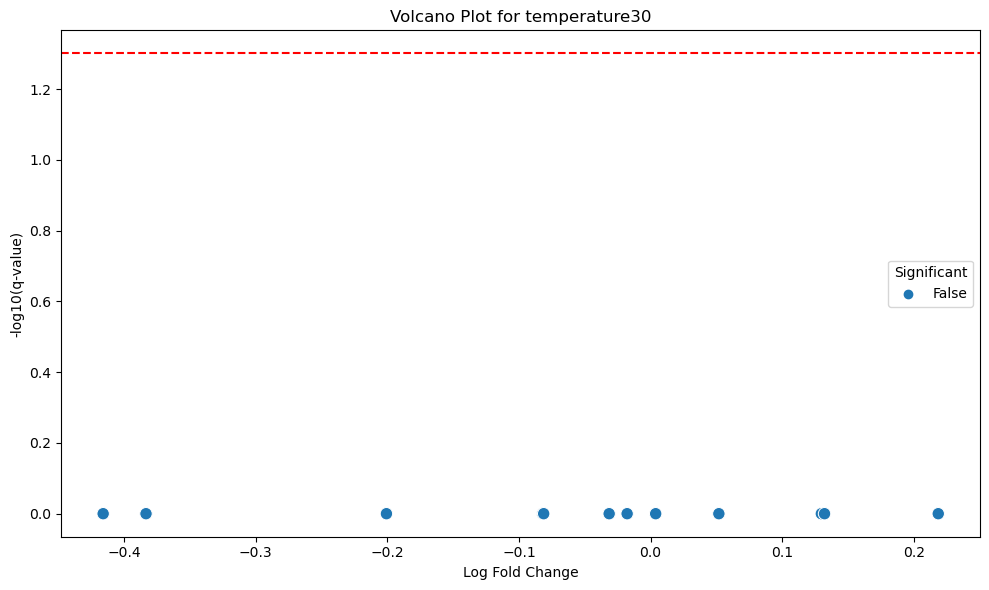

In [103]:
import numpy as np
# Choose term to plot
term = "temperature30"

# Extract log fold change and q-values
volcano_df = df[["taxon", f"lfc_{term}", f"q_{term}"]].dropna()
volcano_df.columns = ["taxon", "logFC", "qval"]
volcano_df["-log10(q)"] = -np.log10(volcano_df["qval"])
volcano_df["significant"] = volcano_df["qval"] < 0.05

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=volcano_df, x="logFC", y="-log10(q)", hue="significant", style="significant", s=80)
plt.axhline(-np.log10(0.05), linestyle="--", color="red")
plt.title(f"Volcano Plot for {term}")
plt.xlabel("Log Fold Change")
plt.ylabel("-log10(q-value)")
plt.legend(title="Significant")
plt.tight_layout()
plt.show()


In [8]:
#make 'taxon' the index in df:
df.set_index('taxon', inplace=True)
df

,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,lfc_day28,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
taxon,,,,,,,,,,,,,,,,,,,,,
Alternaria rosae,-0.085088,0.464076,0.183857,-0.273802,-0.054453,0.186449,0.247527,-0.213357,-0.002443,0.013939,...,True,True,True,True,True,True,True,True,True,True
Alternaria sp.,0.578727,-0.353765,0.034037,-0.054601,-0.161612,-0.325827,-0.366497,-0.870939,-0.528584,-0.521725,...,True,True,True,True,True,False,False,True,True,False
Aureobasidium pullulans,0.093354,0.194131,0.090558,0.097209,-0.169080,0.020796,0.145853,-0.334123,-0.378888,-0.761606,...,True,True,True,True,True,True,False,False,True,True
Cladosporium herbarum,-0.068014,0.134772,0.211033,0.114652,0.434300,-0.304315,0.107525,-0.112182,0.044839,-0.396077,...,True,True,True,True,True,False,True,True,True,True
Filobasidium wieringae,-0.349554,-0.097048,0.000000,0.201248,0.574964,0.325027,0.207644,0.000000,0.087761,0.000000,...,True,True,False,True,True,True,True,True,True,True
Neoascochyta exitialis,-0.230582,0.000000,0.013944,0.389183,-0.053311,0.248887,0.051572,0.092563,0.125201,0.000000,...,True,True,True,False,True,False,True,True,True,True
Parastagonospora sp.,-0.053159,-0.038356,-0.168196,0.184344,0.090794,0.123508,-0.091545,-0.000272,-0.138865,0.000000,...,True,True,True,True,True,True,True,True,True,True
Pleosporaceae sp.,0.179644,-0.168805,0.482925,-0.407306,-0.148779,-0.321066,-0.017070,0.092752,0.322183,0.566612,...,True,True,True,True,True,True,True,True,True,True
Pyrenophora tritici-repentis,-0.107098,0.070574,0.075266,-0.051103,-0.017100,0.120628,0.011050,0.000000,0.083652,0.130243,...,True,True,True,True,True,False,True,True,True,True


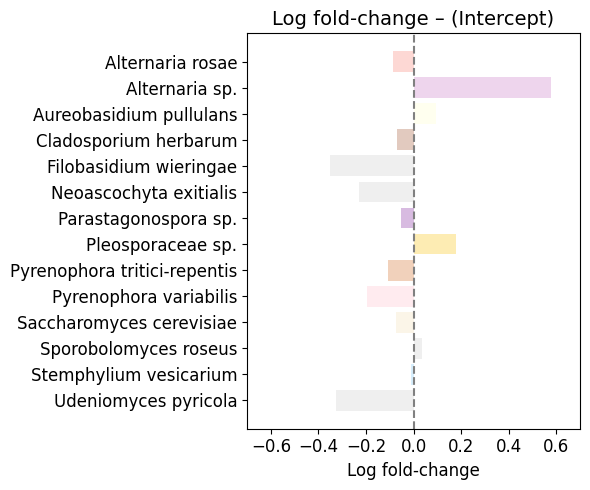

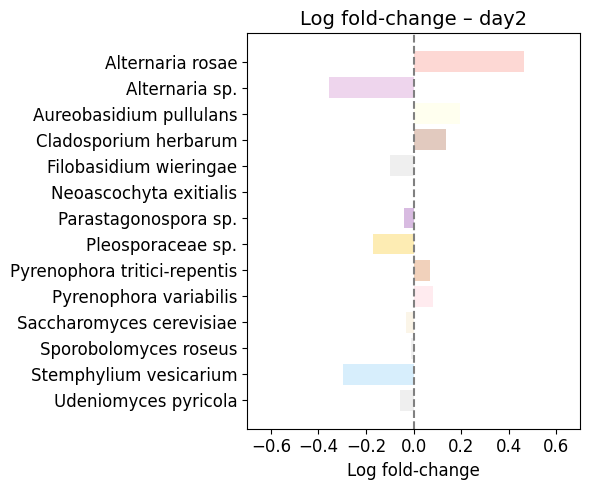

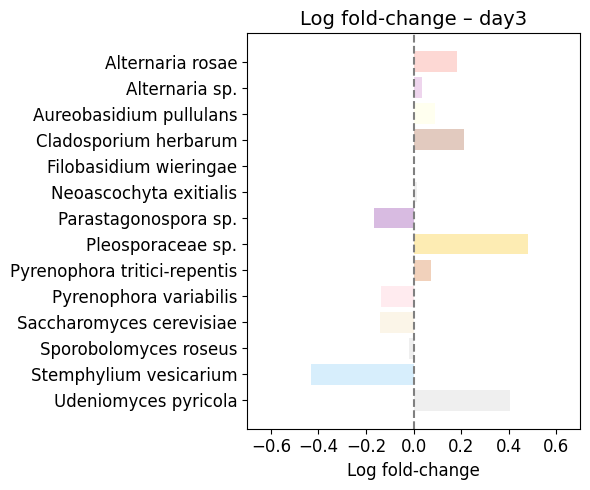

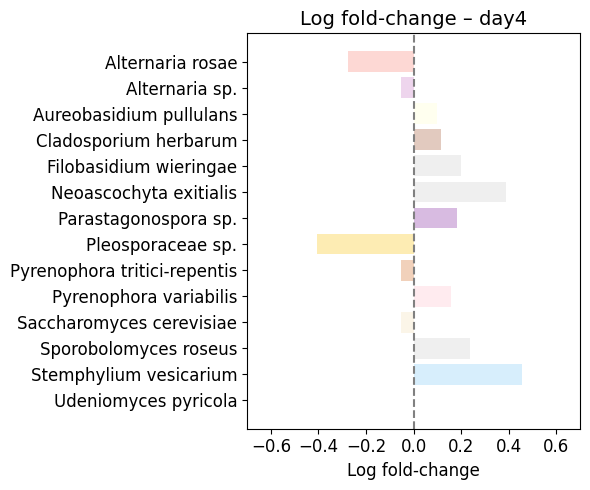

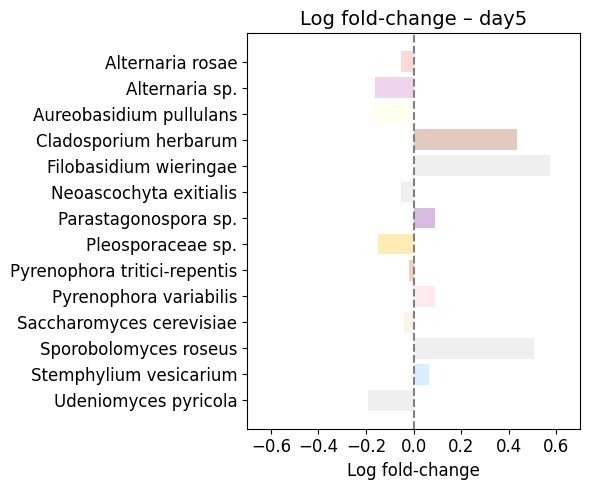

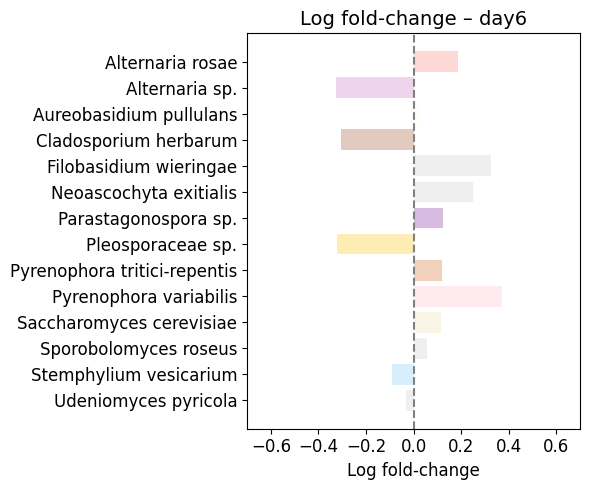

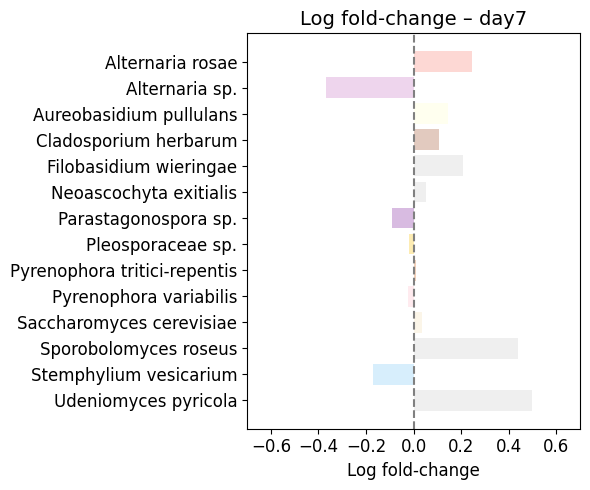

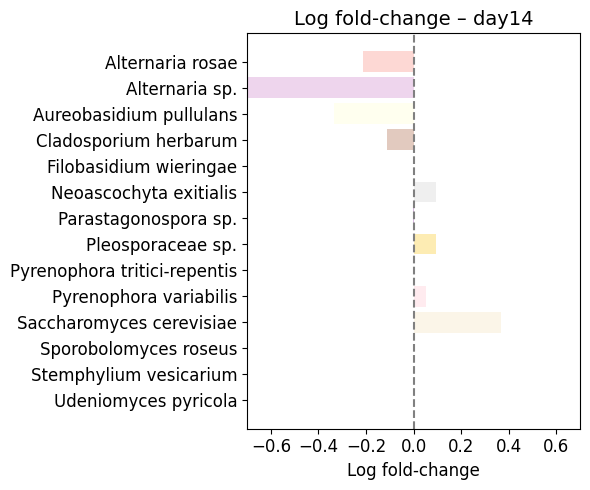

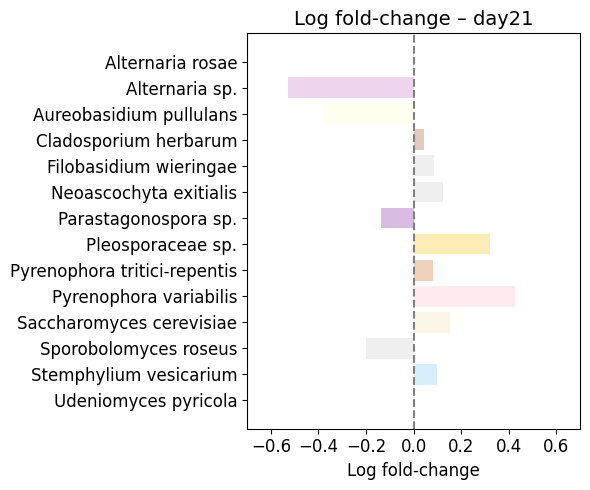

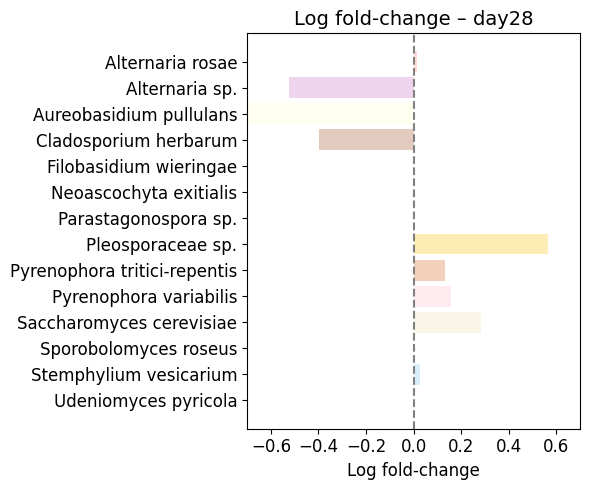

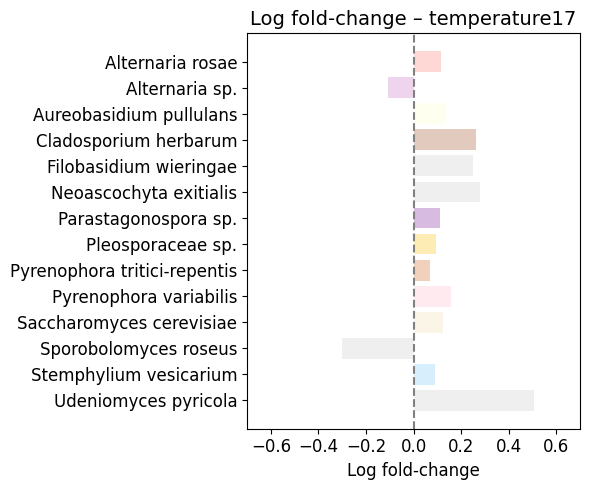

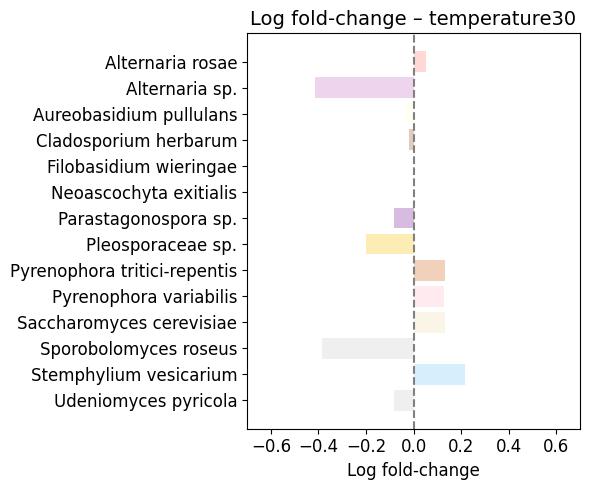

In [9]:

import pandas as pd
import matplotlib.pyplot as plt



# Define custom colors for selected taxa
# Define custom colors for species
custom_colors = {
    'Saccharomyces cerevisiae': '#f5deb3',
    'Alternaria sp.': '#c875c4',
    'Aureobasidium pullulans': '#ffffcb',
    'Pleosporaceae sp.': '#fac205',
    'Cladosporium herbarum': '#a0522d',
    'Alternaria rosae': '#fa8072',
    'Pyrenophora tritici-repentis': '#d2691e',
    'Pyrenophora variabilis': '#ffc0cb',
    'Stemphylium vesicarium': '#7bc8f6',
    'Parastagonospora sp.': '#7e1e9c',
    #'Other': '#c7c7c7'  # Default color for "Other"
}
custom_order = [
    'Lactobacillus sanfranciscensis',
    
    'Lactobacillus rossiae',
    'Lactobacillus brevis',
    'Pediococcus parvulus',
    'Acetobacter cerevisiae'
 ]

# Identify all conditions (e.g., lfc_temperature30, lfc_day14, etc.)
lfc_cols = [col for col in df.columns if col.startswith("lfc_")]
qval_cols = [col for col in df.columns if col.startswith("q_")]
conditions = [col.replace("lfc_", "") for col in lfc_cols]

# Loop through all conditions and plot
for cond in conditions:
    lfc_col = f"lfc_{cond}"
    q_col = f"q_{cond}"

    if lfc_col not in df.columns or q_col not in df.columns:
        continue  # skip if column missing

    plot_df = df[[lfc_col, q_col]].copy()
    plot_df.columns = ["logFC", "qval"]
    plot_df["taxon"] = plot_df.index

    # Define significance and styling
    plot_df["significant"] = plot_df["qval"] < 0.05
    plot_df["alpha"] = plot_df["significant"].apply(lambda x: 1.0 if x else 0.3)
    plot_df["color"] = plot_df["taxon"].map(custom_colors).fillna("#cccccc")

    #plot_df.index = pd.Categorical(plot_df.index, categories=custom_order, ordered=True)
    plot_df = plot_df.sort_index()
    #plot_df = plot_df.sort_values(by="logFC", ascending=True)



    # --- Plot ---
    plt.figure(figsize=(6, 5))
    for _, row in plot_df.iterrows():
        plt.barh(
            y=row["taxon"],
            width=row["logFC"],
            color=row["color"],
            alpha=row["alpha"]
        )

        # Add significance stars
    for _, row in plot_df.iterrows():
        star = (
            "***" if row["qval"] < 0.001 else
            "**" if row["qval"] < 0.01 else
            "*" if row["qval"] < 0.05 else
            ""
        )
        if star:
            xpos = row["logFC"] + (0.1 if row["logFC"] >= 0 else -0.1)
            plt.text(
                xpos, row["taxon"], star,
                va='center', ha='left' if row["logFC"] >= 0 else 'right',
                fontsize=10, fontweight='bold'
            )
    

    plt.axvline(0, linestyle="--", color="gray")
    plt.title(f"Log fold-change – {cond}", fontsize=14)
    plt.xlabel("Log fold-change", fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlim(-0.7, 0.7)
    plt.yticks(fontsize=12)
    plt.ylabel("")
    plt.tight_layout()
    plt.gca().invert_yaxis()
    # Save the plot
    #plt.savefig(f'Figures/20250517_ancombc2_logFC_{cond}_ITS.pdf', bbox_inches='tight')
    plt.show()



In [10]:
df

,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,lfc_day28,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
taxon,,,,,,,,,,,,,,,,,,,,,
Alternaria rosae,-0.085088,0.464076,0.183857,-0.273802,-0.054453,0.186449,0.247527,-0.213357,-0.002443,0.013939,...,True,True,True,True,True,True,True,True,True,True
Alternaria sp.,0.578727,-0.353765,0.034037,-0.054601,-0.161612,-0.325827,-0.366497,-0.870939,-0.528584,-0.521725,...,True,True,True,True,True,False,False,True,True,False
Aureobasidium pullulans,0.093354,0.194131,0.090558,0.097209,-0.169080,0.020796,0.145853,-0.334123,-0.378888,-0.761606,...,True,True,True,True,True,True,False,False,True,True
Cladosporium herbarum,-0.068014,0.134772,0.211033,0.114652,0.434300,-0.304315,0.107525,-0.112182,0.044839,-0.396077,...,True,True,True,True,True,False,True,True,True,True
Filobasidium wieringae,-0.349554,-0.097048,0.000000,0.201248,0.574964,0.325027,0.207644,0.000000,0.087761,0.000000,...,True,True,False,True,True,True,True,True,True,True
Neoascochyta exitialis,-0.230582,0.000000,0.013944,0.389183,-0.053311,0.248887,0.051572,0.092563,0.125201,0.000000,...,True,True,True,False,True,False,True,True,True,True
Parastagonospora sp.,-0.053159,-0.038356,-0.168196,0.184344,0.090794,0.123508,-0.091545,-0.000272,-0.138865,0.000000,...,True,True,True,True,True,True,True,True,True,True
Pleosporaceae sp.,0.179644,-0.168805,0.482925,-0.407306,-0.148779,-0.321066,-0.017070,0.092752,0.322183,0.566612,...,True,True,True,True,True,True,True,True,True,True
Pyrenophora tritici-repentis,-0.107098,0.070574,0.075266,-0.051103,-0.017100,0.120628,0.011050,0.000000,0.083652,0.130243,...,True,True,True,True,True,False,True,True,True,True


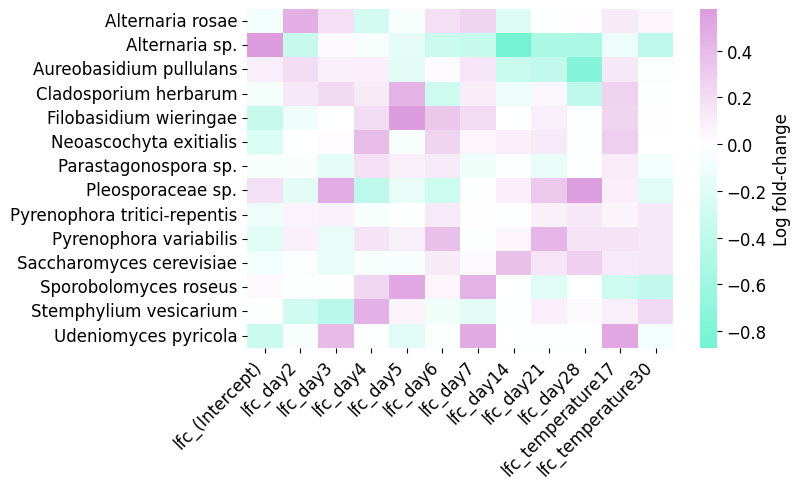

In [11]:

from matplotlib.colors import LinearSegmentedColormap
# Select all logFC columns
lfc_cols = [col for col in df.columns if col.startswith("lfc_")]
lfc_df = df[lfc_cols]

# Optional: filter to taxa with at least one significant q-value
# q_cols = [col for col in df.columns if col.startswith("q_")]
# significant_taxa = df[df[q_cols].lt(0.05).any(axis=1)].index.tolist()
#lfc_df_filtered = lfc_df.loc[lfc_df.index.isin(significant_taxa)]
lfc_df_filtered = lfc_df.copy()
# Get matching q-value columns
qval_cols = [col.replace("lfc_", "q_") for col in lfc_cols]
qval_df = df[qval_cols].copy()
qval_df.columns = lfc_df.columns  # rename to match lfc_df for easy alignment


# Plot
#make the own color map with those two colors: "#345084FF", "#CB6BCEFF":
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=256
)


# Plot
plt.figure(figsize=(8, 5))
ax = sns.heatmap(
    lfc_df_filtered,
    cmap=custom_cmap,
    center=0,
    cbar_kws={"label": "Log fold-change"}
)

# Adjust tick fonts
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation =0,fontsize=12)

# Adjust colorbar font
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)               # Colorbar tick labels
cbar.ax.set_ylabel("Log fold-change", fontsize=12)  # Colorbar label

plt.xlabel("")
plt.ylabel("")
plt.title("")
# Add stars for significant (q < 0.05) entries
for y, row_label in enumerate(lfc_df_filtered.index):
    for x, col_label in enumerate(lfc_df_filtered.columns):
        qval = qval_df.loc[row_label, col_label]
        if qval < 0.05:
            ax.text(
                x + 0.5, y + 0.5, '*',
                ha='center', va='center',
                color='white', fontsize=14, fontweight='bold'
            )

plt.tight_layout()
# Save the plot
#plt.savefig(f'Figures/20250516_ancombc2_heatmap_ITS.pdf', bbox_inches='tight')
plt.show()



/var/folders/mn/3_jl7ykj1qd6kmb2tjjqbgt80000gp/T/ipykernel_80883/1944730708.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


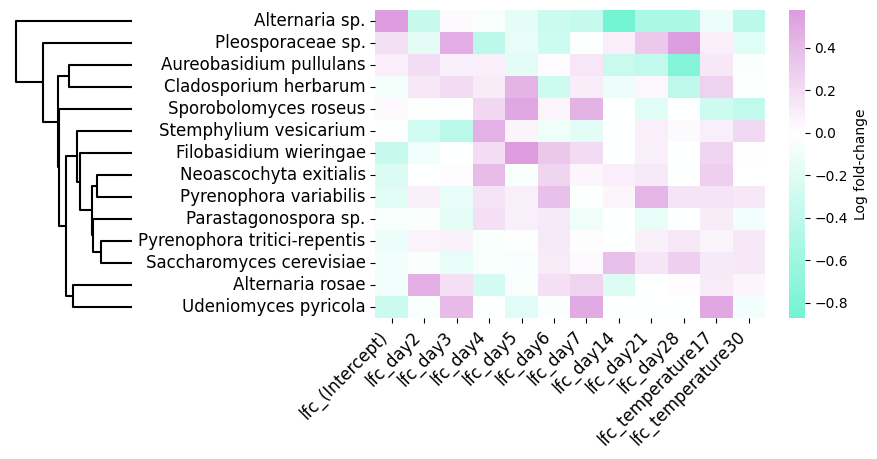

In [12]:

from matplotlib.colors import LinearSegmentedColormap
# Select all logFC columns
lfc_cols = [col for col in df.columns if col.startswith("lfc_")]
lfc_df = df[lfc_cols]

# Optional: filter to taxa with at least one significant q-value
# q_cols = [col for col in df.columns if col.startswith("q_")]
# significant_taxa = df[df[q_cols].lt(0.05).any(axis=1)].index.tolist()
#lfc_df_filtered = lfc_df.loc[lfc_df.index.isin(significant_taxa)]
lfc_df_filtered = lfc_df.copy()
# Get matching q-value columns
qval_cols = [col.replace("lfc_", "q_") for col in lfc_cols]
qval_df = df[qval_cols].copy()
qval_df.columns = lfc_df.columns  # rename to match lfc_df for easy alignment
lfc_df_filtered = lfc_df_filtered.fillna(0)  # Fill NaN values with 0
lfc_df_filtered = lfc_df_filtered + 1e-20  # Avoid log(0) issues
# Plot
#make the own color map with those two colors: "#345084FF", "#CB6BCEFF":
custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=["#74F3D3FF", "#FFFFFF", "#CB6BCEFF"],
    N=256
)

# Plot
from scipy.cluster.hierarchy import linkage, leaves_list

# Cluster taxa (rows)
row_linkage = linkage(lfc_df_filtered, method='average', metric='euclidean')
row_order = leaves_list(row_linkage)

# Cluster conditions (columns)
#col_linkage = linkage(lfc_df_filtered.T, method='average', metric='euclidean')
#col_order = leaves_list(col_linkage)

# Reorder the matrix
lfc_clustered = lfc_df_filtered.iloc[row_order, :]
qval_clustered = qval_df.loc[lfc_clustered.index, lfc_clustered.columns]

from scipy.cluster.hierarchy import dendrogram
import matplotlib.gridspec as gridspec

# Create figure with subplots: dendrogram + heatmap
fig = plt.figure(figsize=(11, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4], wspace=0.8)

# Plot dendrogram
ax_dendro = plt.subplot(gs[0])
dendro = dendrogram(row_linkage, orientation='left', no_labels=True, ax=ax_dendro, color_threshold=0,
                    link_color_func=lambda k: 'black')
ax_dendro.invert_yaxis()
ax_dendro.axis('off')



# Reorder heatmap data based on dendrogram leaves
lfc_clustered = lfc_df_filtered.iloc[row_order, :]
qval_clustered = qval_df.loc[lfc_clustered.index, lfc_clustered.columns]

# Plot heatmap
ax_heatmap = plt.subplot(gs[1])
sns.heatmap(
    lfc_clustered,

    cmap=custom_cmap,
    center=0,
    ax=ax_heatmap,
    cbar_kws={"label": "Log fold-change"}
)

for y, row_label in enumerate(lfc_clustered.index):
    for x, col_label in enumerate(lfc_clustered.columns):
        qval = qval_clustered.loc[row_label, col_label]
        if qval < 0.05:
            ax_heatmap.text(x + 0.5, y + 0.5, '*',
                            ha='center', va='center',
                            color='white', fontsize=14, fontweight='bold')


# Styling
ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax_heatmap.set_yticklabels(ax_heatmap.get_yticklabels(), rotation=0, fontsize=12)
ax_heatmap.set_xlabel("")
ax_heatmap.set_ylabel("")

plt.tight_layout()


# Save the plot
#plt.savefig(f'Figures/20250516_ancombc2_heatmap_ITS_with_cluster.pdf', bbox_inches='tight')
plt.show()

In [13]:
#make a column out of 'taxon' which is currently the index:
df.reset_index(inplace=True)
df

,taxon,lfc_(Intercept),lfc_day2,lfc_day3,lfc_day4,lfc_day5,lfc_day6,lfc_day7,lfc_day14,lfc_day21,...,passed_ss_day3,passed_ss_day4,passed_ss_day5,passed_ss_day6,passed_ss_day7,passed_ss_day14,passed_ss_day21,passed_ss_day28,passed_ss_temperature17,passed_ss_temperature30
0,Alternaria rosae,-0.085088,0.464076,0.183857,-0.273802,-0.054453,0.186449,0.247527,-0.213357,-0.002443,...,True,True,True,True,True,True,True,True,True,True
1,Alternaria sp.,0.578727,-0.353765,0.034037,-0.054601,-0.161612,-0.325827,-0.366497,-0.870939,-0.528584,...,True,True,True,True,True,False,False,True,True,False
2,Aureobasidium pullulans,0.093354,0.194131,0.090558,0.097209,-0.169080,0.020796,0.145853,-0.334123,-0.378888,...,True,True,True,True,True,True,False,False,True,True
3,Cladosporium herbarum,-0.068014,0.134772,0.211033,0.114652,0.434300,-0.304315,0.107525,-0.112182,0.044839,...,True,True,True,True,True,False,True,True,True,True
4,Filobasidium wieringae,-0.349554,-0.097048,0.000000,0.201248,0.574964,0.325027,0.207644,0.000000,0.087761,...,True,True,False,True,True,True,True,True,True,True
5,Neoascochyta exitialis,-0.230582,0.000000,0.013944,0.389183,-0.053311,0.248887,0.051572,0.092563,0.125201,...,True,True,True,False,True,False,True,True,True,True
6,Parastagonospora sp.,-0.053159,-0.038356,-0.168196,0.184344,0.090794,0.123508,-0.091545,-0.000272,-0.138865,...,True,True,True,True,True,True,True,True,True,True
7,Pleosporaceae sp.,0.179644,-0.168805,0.482925,-0.407306,-0.148779,-0.321066,-0.017070,0.092752,0.322183,...,True,True,True,True,True,True,True,True,True,True
8,Pyrenophora tritici-repentis,-0.107098,0.070574,0.075266,-0.051103,-0.017100,0.120628,0.011050,0.000000,0.083652,...,True,True,True,True,True,False,True,True,True,True
9,Pyrenophora variabilis,-0.195920,0.082382,-0.138595,0.155717,0.088188,0.372033,-0.023062,0.050290,0.425998,...,True,True,True,True,True,True,True,True,True,True


In [14]:
df.columns.to_list()

['taxon',
 'lfc_(Intercept)',
 'lfc_day2',
 'lfc_day3',
 'lfc_day4',
 'lfc_day5',
 'lfc_day6',
 'lfc_day7',
 'lfc_day14',
 'lfc_day21',
 'lfc_day28',
 'lfc_temperature17',
 'lfc_temperature30',
 'se_(Intercept)',
 'se_day2',
 'se_day3',
 'se_day4',
 'se_day5',
 'se_day6',
 'se_day7',
 'se_day14',
 'se_day21',
 'se_day28',
 'se_temperature17',
 'se_temperature30',
 'W_(Intercept)',
 'W_day2',
 'W_day3',
 'W_day4',
 'W_day5',
 'W_day6',
 'W_day7',
 'W_day14',
 'W_day21',
 'W_day28',
 'W_temperature17',
 'W_temperature30',
 'p_(Intercept)',
 'p_day2',
 'p_day3',
 'p_day4',
 'p_day5',
 'p_day6',
 'p_day7',
 'p_day14',
 'p_day21',
 'p_day28',
 'p_temperature17',
 'p_temperature30',
 'q_(Intercept)',
 'q_day2',
 'q_day3',
 'q_day4',
 'q_day5',
 'q_day6',
 'q_day7',
 'q_day14',
 'q_day21',
 'q_day28',
 'q_temperature17',
 'q_temperature30',
 'diff_(Intercept)',
 'diff_day2',
 'diff_day3',
 'diff_day4',
 'diff_day5',
 'diff_day6',
 'diff_day7',
 'diff_day14',
 'diff_day21',
 'diff_day28',
 'di

Log-ratio analysis of compositional shifts based on ANCOM-BC2 differential abundance

Differential abundance testing was conducted using ANCOM-BC2, and log-fold changes (logFC) were extracted for the intercept term, representing overall shifts independent of specific covariates. Taxa with logFC > 0.5 were considered enriched (numerator group), while those with logFC < –0.5 were considered depleted (denominator group). No p-value or q-value thresholding was applied to filter taxa in this analysis.

To account for the compositional nature of microbiome data, log-ratios were computed between the geometric means of enriched and depleted taxa. Prior to computing geometric means, zero counts were replaced with missing values (NaN) to avoid zero inflation. The log-ratio for each sample was calculated as:

log-ratio
=
log
⁡
(
gmean of enriched taxa
)
−
log
⁡
(
gmean of depleted taxa
)
log-ratio=log(gmean of enriched taxa)−log(gmean of depleted taxa)
Samples with missing values for either numerator or denominator groups were excluded from the log-ratio calculation. The resulting log-ratios were merged with sample metadata and visualized using boxplots across temperature conditions and sampling days.

In [15]:
# Filter LFCs for a given condition
term = "(Intercept)"  # Example condition
lfc_data = df[["taxon", f"lfc_{term}", f"q_{term}", f"p_{term}"]].dropna()
lfc_data.columns = ["taxon", "logFC", "qval", "pval"]

# Define thresholds
#sig_taxa = lfc_data[lfc_data["qval"] < 0.05]
sig_taxa = lfc_data.copy()
numerator_taxa = sig_taxa[sig_taxa["logFC"] > 0.1]["taxon"]
denominator_taxa = sig_taxa[sig_taxa["logFC"] < -0.1]["taxon"]


In [19]:
otu_df =otu_table.copy()

In [20]:
from scipy.stats import gmean
import numpy as np

# Make sure OTU table matches taxon names
otu_sub = otu_df[numerator_taxa.tolist() + denominator_taxa.tolist()].replace(0, np.nan)

def compute_log_ratio(row):
    num_vals = row[numerator_taxa].dropna()
    den_vals = row[denominator_taxa].dropna()
    if len(num_vals) == 0 or len(den_vals) == 0:
        return np.nan
    return np.log(gmean(num_vals)) - np.log(gmean(den_vals))

otu_df["log_ratio"] = otu_sub.apply(compute_log_ratio, axis=1)


In [27]:
sig_taxa

,taxon,logFC,qval,pval
0,Alternaria rosae,-0.085088,0.997784,0.981850
1,Alternaria sp.,0.578727,0.997784,0.852397
2,Aureobasidium pullulans,0.093354,0.997784,0.977036
3,Cladosporium herbarum,-0.068014,0.997784,0.984249
4,Filobasidium wieringae,-0.349554,0.997784,0.943255
5,Neoascochyta exitialis,-0.230582,0.997784,0.961077
6,Parastagonospora sp.,-0.053159,0.997784,0.990194
7,Pleosporaceae sp.,0.179644,0.997784,0.959200
8,Pyrenophora tritici-repentis,-0.107098,0.997784,0.977447
9,Pyrenophora variabilis,-0.195920,0.997784,0.959906


In [24]:
denominator_taxa

4           Filobasidium wieringae
5           Neoascochyta exitialis
8     Pyrenophora tritici-repentis
9           Pyrenophora variabilis
13            Udeniomyces pyricola
Name: taxon, dtype: object

In [23]:
numerator_taxa

1       Alternaria sp.
7    Pleosporaceae sp.
Name: taxon, dtype: object

In [21]:
meta_df = metadata.copy()
#drop the 20 degree samples:
meta_df = meta_df[~meta_df['temperature'].isin([20])]

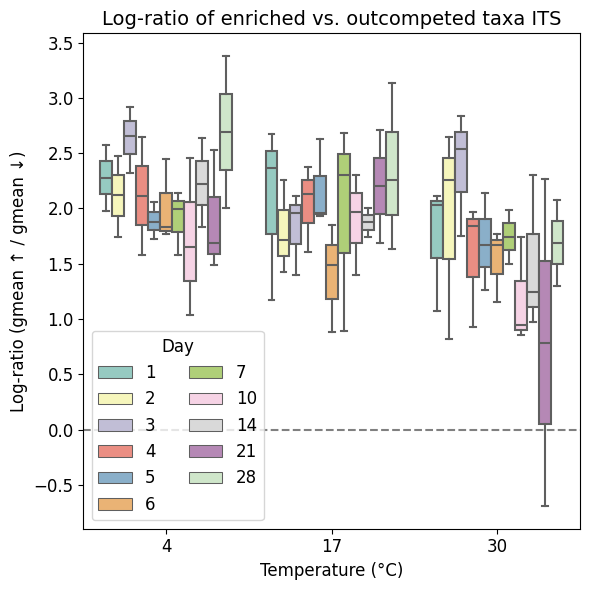

In [22]:
log_ratio_df = otu_df[["log_ratio"]].join(meta_df)
palette = sns.color_palette("Set3", 11) 

plt.figure(figsize=(6, 6))
sns.boxplot(data=log_ratio_df, x="temperature", y="log_ratio", hue="day", palette=palette)
plt.axhline(0, linestyle="--", color="grey")
plt.title("Log-ratio of enriched vs. outcompeted taxa ITS", fontsize=14)
plt.ylabel("Log-ratio (gmean ↑ / gmean ↓)", fontsize=12)
plt.xlabel("Temperature (°C)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Day", fontsize=12, title_fontsize=12, loc='lower left', ncol = 2)
plt.tight_layout()
# Save the plot
#plt.savefig(f'Figures/20250516_ancombc2_log_ratio_all_temps_ITS.pdf', bbox_inches='tight')
plt.show()
